## Section transports

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *;
from mom6_tools.m6toolbox import weighted_temporal_mean
%matplotlib inline

In [2]:
transports = []
for path, case in zip(ocn_path, casename):
  ds = xr.open_dataset(path+case+'_section_transports.nc').sel(time=slice('0001-01-01',end_date))
  transports.append(weighted_temporal_mean(ds,'transport'))

In [3]:
def plotPanel(section,n,label):
    ax = plt.subplot(7,3,n+1)
    plt.plot(section.time,section.values, lw=2, label=label)
    plt.title(section.sections.values,fontsize=12)
    plt.grid()
    if n in [0,3,6,9,12,15,18]: plt.ylabel('Transport (Sv)')
    
    return

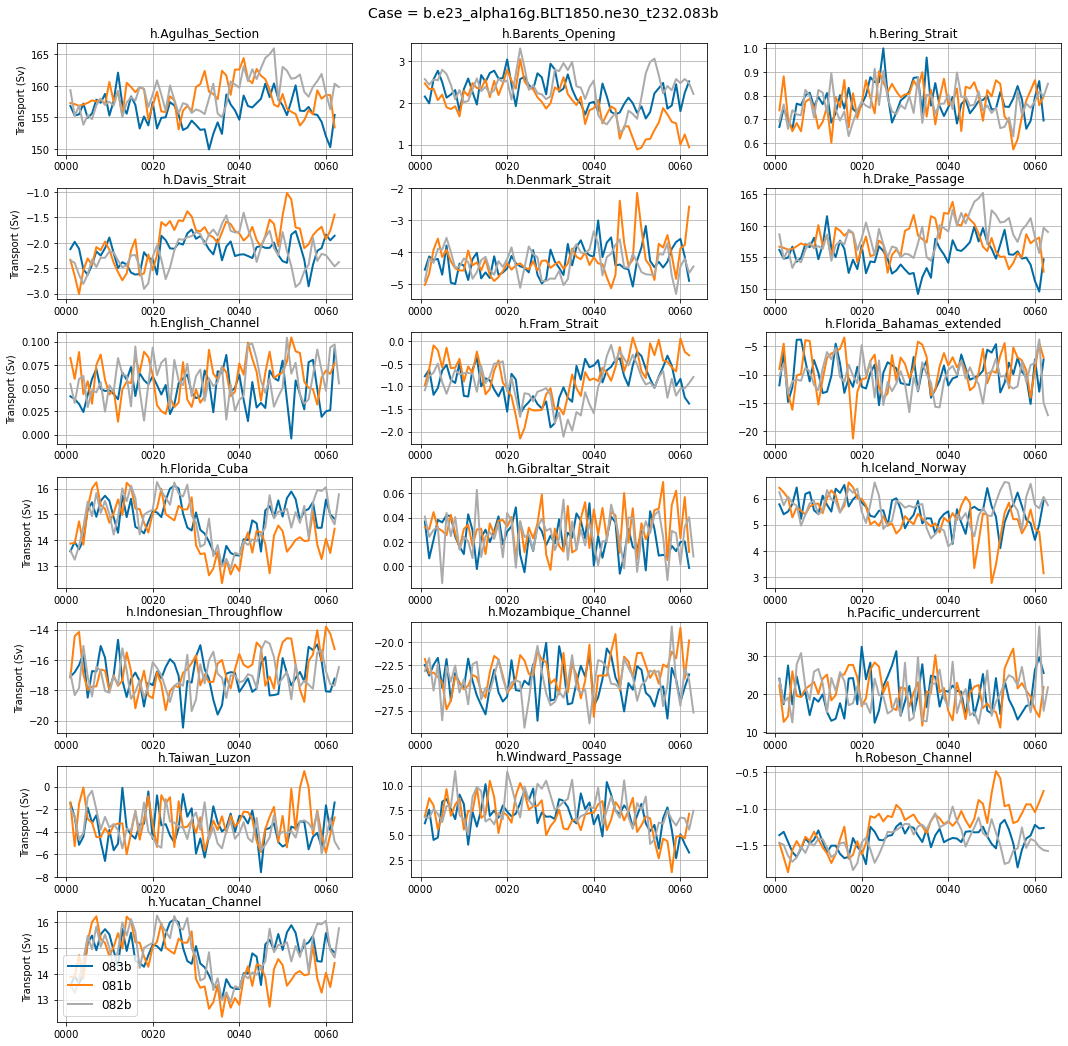

In [4]:
fig = plt.figure(figsize=(18,18))
for n in range(0,len(ds.sections)): 
  for i in range(0,len(casename)):
    plotPanel(transports[i][n,:],n,label[i])
    
fig.text(0.5,0.9,'Case = '+str(casename[0]),horizontalalignment='center',fontsize=14)
plt.subplots_adjust(hspace=0.3)
plt.legend(fontsize=12);